In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [164]:
class LineerRegresyon:
    def __init__(self, w_intercept=True):
        self.coef_ = None
        self.intercept = w_intercept
        self.is_fit = False

    def add_intercept(self, X):
        rows = X.shape[0]  # Kaç satırlık bir veri olduğuna bakıyoruz.
        inter = np.ones(rows).reshape(-1,1)
        return np.hstack((X,inter))

    def fit(self, X, y):
        X = self.convert_to_array(X)
        y = self.convert_to_array(y)

        if self.intercept:
            X = self.add_intercept(X)
        
        # Aşama 1:
        temp_xtx = np.linalg.inv(np.dot(X.T,X))
        # Aşama 2:
        temp_xty = np.dot(X.T,y)
        # Aşama 3:
        self.coef_ = np.dot(temp_xtx,temp_xty)
        self.is_fit = True
        
    def predict(self, X):
        if not self.is_fit:
            raise ValueError("Fit etmeden bir yere gitmez bu fonksiyon")

        X = self.convert_to_array(X)
        if self.intercept:
            X = self.add_intercept(X)
        return np.dot(X,self.coef_)
        
    def pandas_to_numpy(self, x):
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            # Pandas kütüphanesinin verdiğimiz data frame'i nump array'ine çevirdiği fonksiyon
            return x.as_matrix()
        if type(x) == type(np.array([1, 2])):
            return x
        return np.array(x)
    
    def handle_1d_data(self, x):
        """ Eğer tek satırlık bir veri seti gelmişse elimize, hepsini tek bir sütüna çeviriyoruz.
        Transpozunu alıyoruz yani."""
        if x.ndim == 1:
            x = x.reshape(-1, 1)
        return x

    def convert_to_array(self, x):
        # data frame olarak gelebilcek verileri array'e çeviriyoruz.
        x = self.pandas_to_numpy(x)
        x = self.handle_1d_data(x)
        return x

    def score(self, X, y):
        X = self.convert_to_array(X)
        y = self.convert_to_array(y)
        pred = self.predict(X)
        return np.mean((np.array(pred)-np.array(y))**2)

In [165]:
df = pd.read_csv("train.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [166]:
s1 = pd.Series(df["math score"])
s2 = pd.Series(df["writing score"])
new_frame = pd.concat(objs=(s1 , s2), axis=1)
new_frame = new_frame.astype(int)
train_df = new_frame[0:int((len(new_frame)*70)/100)]
test_df = new_frame[int((len(new_frame)*70)/100):len(new_frame)]

In [167]:
X = train_df["math score"]
y = train_df["writing score"]
lr = LineerRegresyon(w_intercept=True)
lr.fit(X,y)
lr.coef_

/Users/mertnuhuz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


array([[ 0.80988951],
       [14.37919348]])

In [168]:
lr.predict([70])

array([[71.07145914]])

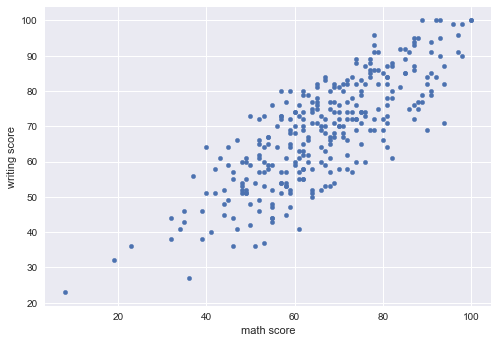

In [170]:
test_df.plot.scatter(x="math score", y="writing score")

/Users/mertnuhuz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


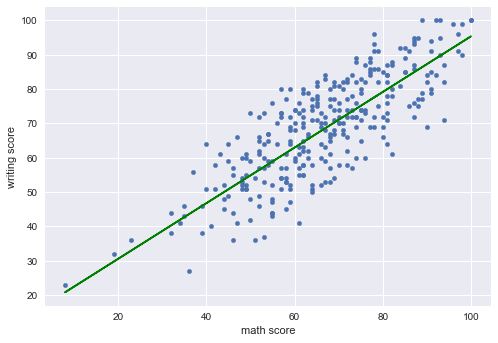

In [171]:
X = pd.Series(test_df["math score"])
y = lr.predict(test_df["math score"]).tolist()
test_df.plot.scatter(x="math score", y="writing score")
plt.plot(X,y,color="green")

In [172]:
lr.score(train_df["math score"],train_df["writing score"])

/Users/mertnuhuz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


82.38893120969327